loading necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/credit_card_default.csv')

In [5]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Outlier Handling

<Axes: >

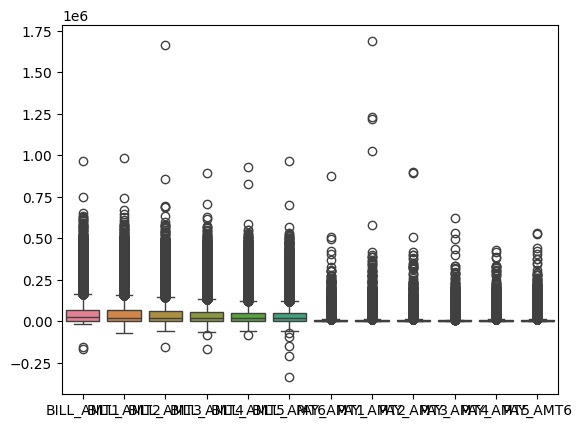

In [8]:
sns.boxplot(data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']])

In [9]:
data['BILL_AMT1'].describe()

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [10]:
q1=data['BILL_AMT1'].quantile(0.25)
q2=data['BILL_AMT1'].quantile(0.5)
q3=data['BILL_AMT1'].quantile(0.75)
iqr=q3-q1
print(iqr)

63532.25


In [11]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

162389.375
-91739.625


In [16]:
# to cap the outliers
def limit_imputer(value):
  if value>upper_lim:
    return upper_lim
  if value<lower_lim:
    return lower_lim
  else:
    return value

In [12]:
data['BILL_AMT1']=data['BILL_AMT1'].astype('int64')

In [17]:
data['BILL_AMT1'].dtype

dtype('int64')

In [18]:
data['BILL_AMT1']=data['BILL_AMT1'].apply(limit_imputer)

In [19]:
data['BILL_AMT1'].describe()

count     30000.000000
mean      44293.480167
std       51294.870270
min      -91739.625000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      162389.375000
Name: BILL_AMT1, dtype: float64

In [20]:
data.shape

(30000, 25)

In [21]:
q1=data['BILL_AMT2'].quantile(0.25)
q2=data['BILL_AMT2'].quantile(0.5)
q3=data['BILL_AMT2'].quantile(0.75)
iqr=q3-q1
print(iqr)

61021.5


In [22]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

155538.5
-88547.5


In [23]:
data['BILL_AMT2']=data['BILL_AMT2'].astype('int64')

In [24]:
data['BILL_AMT2']=data['BILL_AMT2'].apply(limit_imputer)

In [25]:
q1=data['BILL_AMT3'].quantile(0.25)
q2=data['BILL_AMT3'].quantile(0.5)
q3=data['BILL_AMT3'].quantile(0.75)
iqr=q3-q1
print(iqr)

57498.5


In [26]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

146412.5
-83581.5


In [27]:
data['BILL_AMT3']=data['BILL_AMT3'].apply(limit_imputer)

In [28]:
q1=data['BILL_AMT4'].quantile(0.25)
q2=data['BILL_AMT4'].quantile(0.5)
q3=data['BILL_AMT4'].quantile(0.75)
iqr=q3-q1
print(iqr)



52179.25


In [29]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)


132774.875
-75942.125


In [30]:
data['BILL_AMT4']=data['BILL_AMT4'].apply(limit_imputer)

In [35]:
q1=data['BILL_AMT5'].quantile(0.25)
q2=data['BILL_AMT5'].quantile(0.5)
q3=data['BILL_AMT5'].quantile(0.75)
iqr=q3-q1
print(iqr)



48427.5


In [36]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

122831.75
-70878.25


In [38]:
data['BILL_AMT5']=data['BILL_AMT5'].apply(limit_imputer)

In [40]:
q1=data['BILL_AMT6'].quantile(0.25)
q2=data['BILL_AMT6'].quantile(0.5)
q3=data['BILL_AMT6'].quantile(0.75)
iqr=q3-q1
print(iqr)

47942.25


In [41]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

121111.625
-70657.375


In [42]:
data['BILL_AMT6']=data['BILL_AMT6'].apply(limit_imputer)


In [43]:
q1=data['PAY_AMT1'].quantile(0.25)
q2=data['PAY_AMT1'].quantile(0.5)
q3=data['PAY_AMT1'].quantile(0.75)
iqr=q3-q1
print(iqr)

4006.0


In [44]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

11015.0
-5009.0


In [45]:
data['PAY_AMT1']=data['PAY_AMT1'].apply(limit_imputer)

In [46]:
q1=data['PAY_AMT2'].quantile(0.25)
q2=data['PAY_AMT2'].quantile(0.5)
q3=data['PAY_AMT2'].quantile(0.75)
iqr=q3-q1
print(iqr)

4167.0


In [47]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

11250.5
-5417.5


In [48]:
data['PAY_AMT2']=data['PAY_AMT2'].apply(limit_imputer)

In [49]:
q1=data['PAY_AMT3'].quantile(0.25)
q2=data['PAY_AMT3'].quantile(0.5)
q3=data['PAY_AMT3'].quantile(0.75)
iqr=q3-q1
print(iqr)

4115.0


In [50]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

10677.5
-5782.5


In [51]:
data['PAY_AMT3']=data['PAY_AMT3'].apply(limit_imputer)

In [52]:
q1=data['PAY_AMT4'].quantile(0.25)
q2=data['PAY_AMT4'].quantile(0.5)
q3=data['PAY_AMT4'].quantile(0.75)
iqr=q3-q1
print(iqr)

3717.25


In [53]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

9589.125
-5279.875


In [54]:
data['PAY_AMT4']=data['PAY_AMT4'].apply(limit_imputer)

In [55]:
q1=data['PAY_AMT5'].quantile(0.25)
q2=data['PAY_AMT5'].quantile(0.5)
q3=data['PAY_AMT5'].quantile(0.75)
iqr=q3-q1
print(iqr)

3779.0


In [56]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

9700.0
-5416.0


In [58]:
data['PAY_AMT5']=data['PAY_AMT5'].apply(limit_imputer)

In [59]:
q1=data['PAY_AMT6'].quantile(0.25)
q2=data['PAY_AMT6'].quantile(0.5)
q3=data['PAY_AMT6'].quantile(0.75)
iqr=q3-q1
print(iqr)

3882.25


In [60]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

9823.375
-5705.625


In [61]:
data['PAY_AMT6']=data['PAY_AMT6'].apply(limit_imputer)

Information of dataset

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Visualising the dataset

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <A

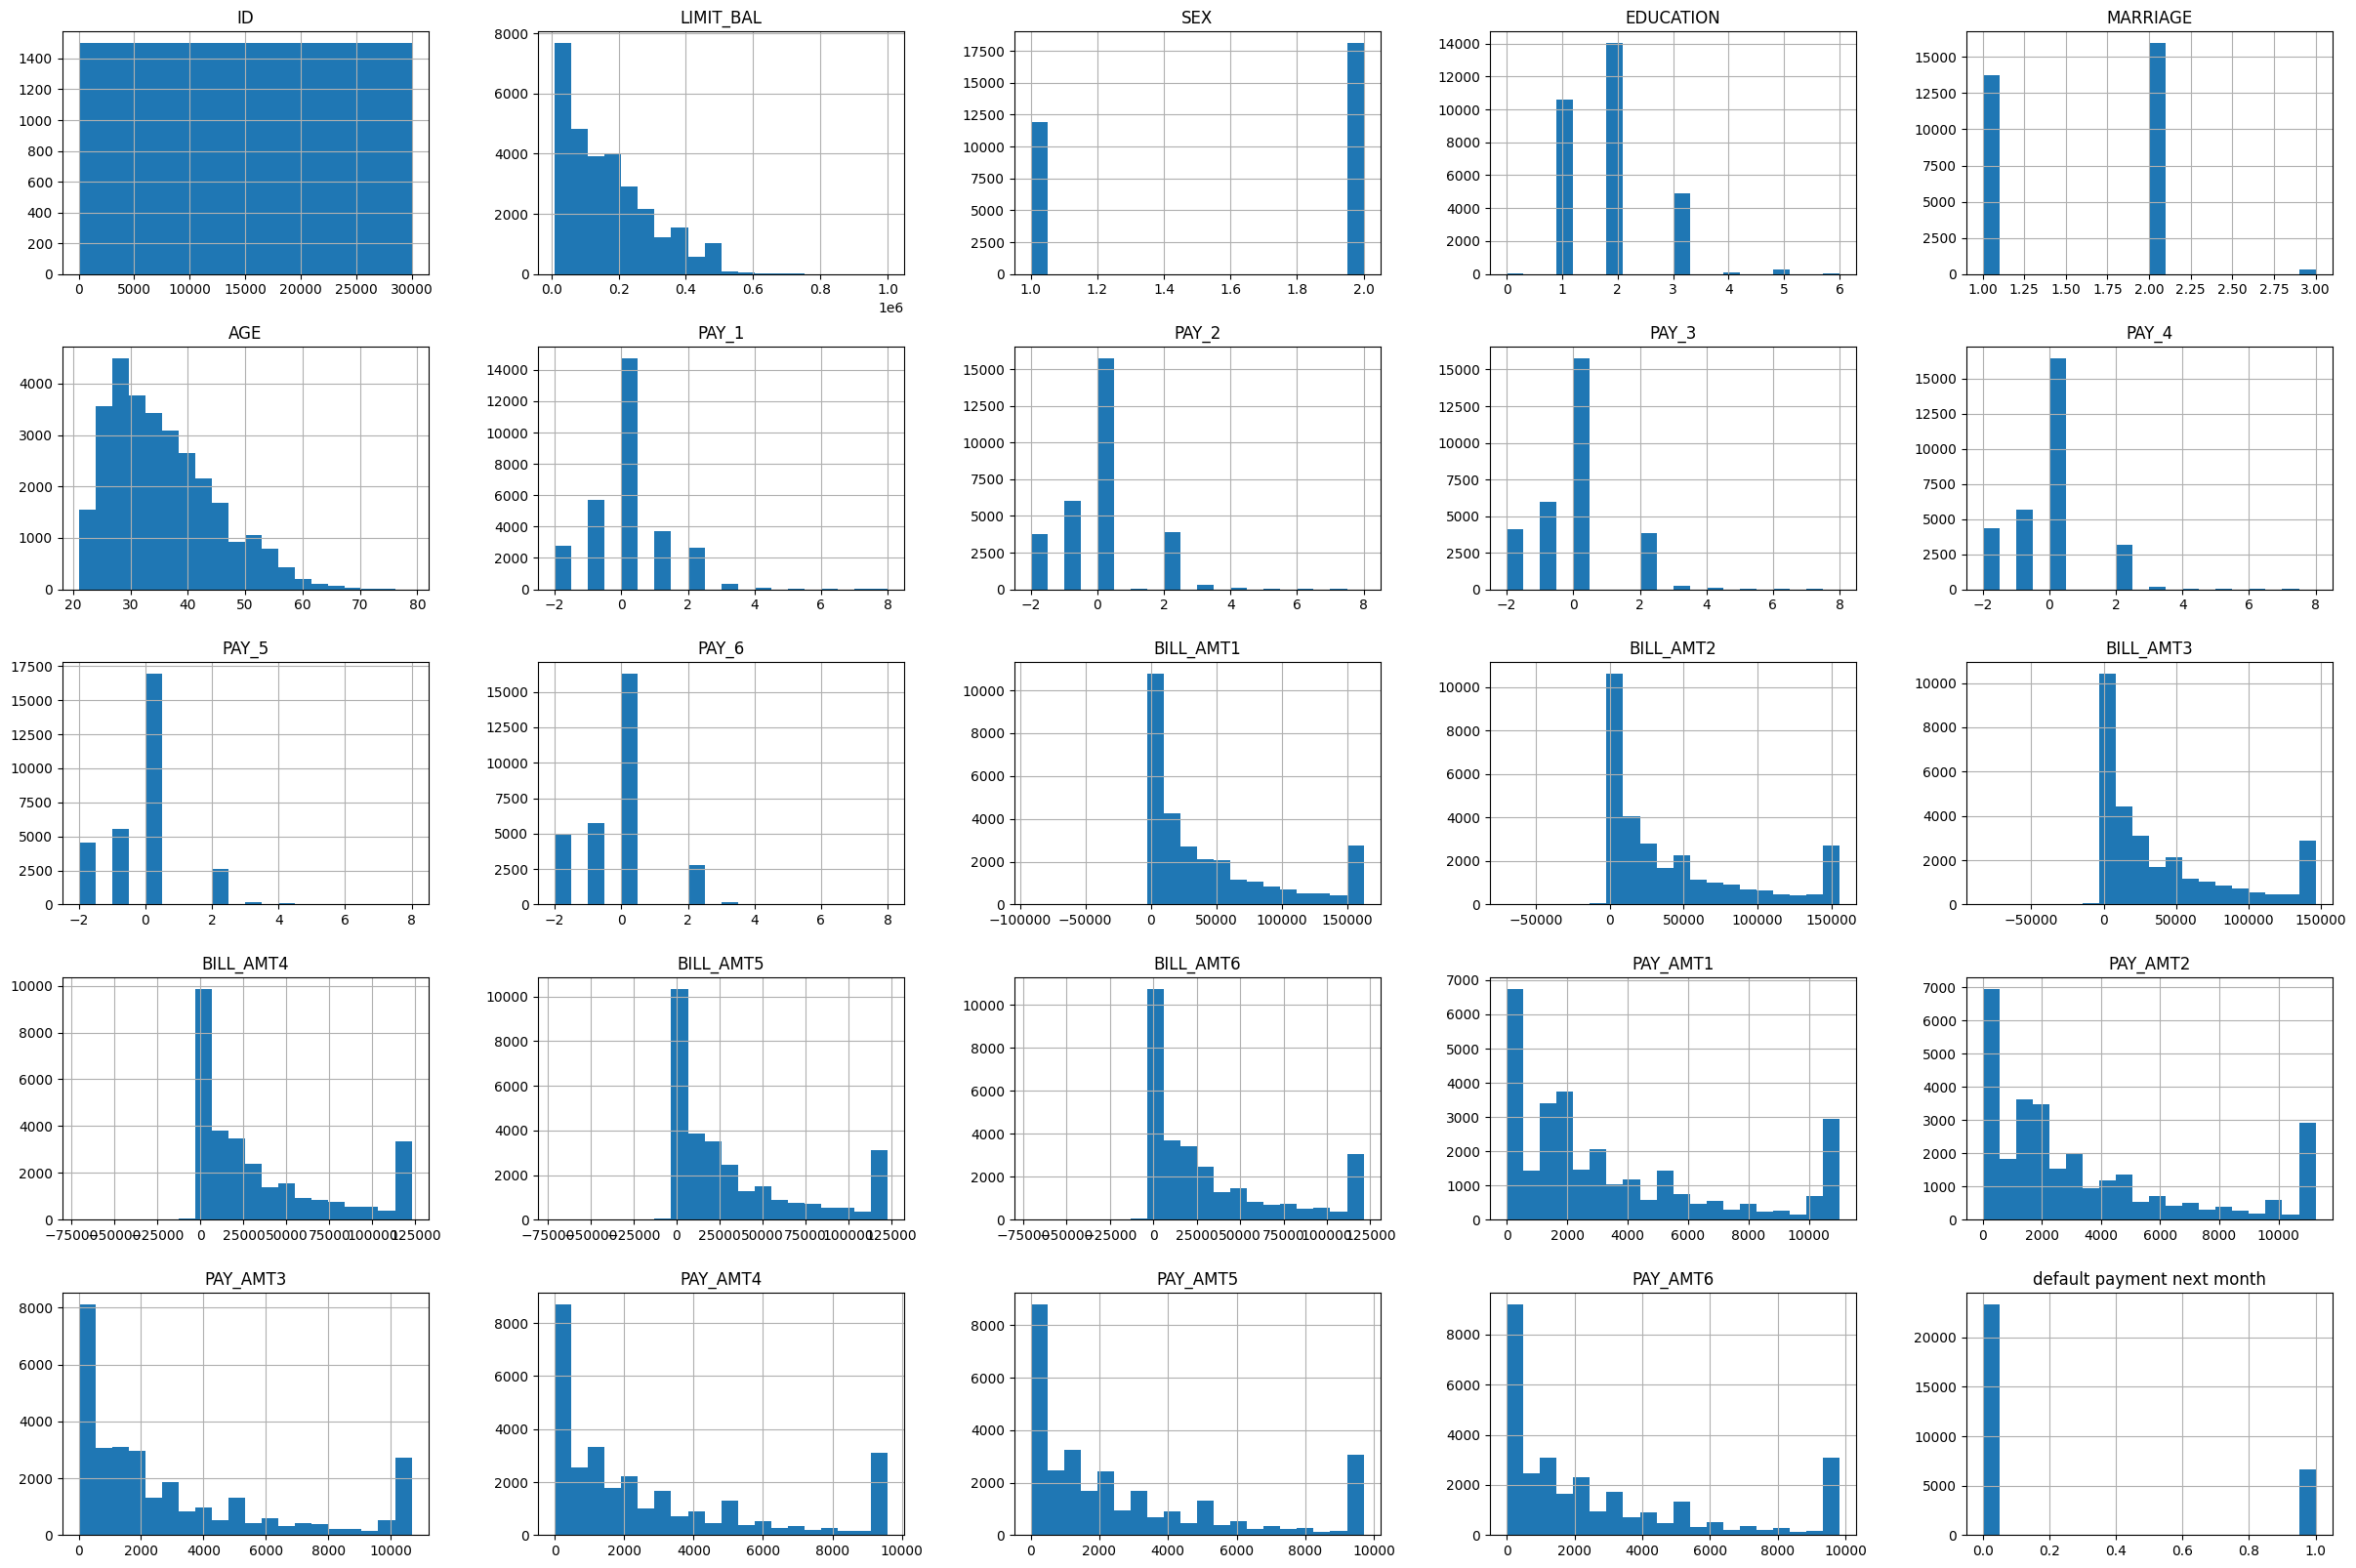

In [63]:
data.hist(figsize=(30,20),bins=20)

In [65]:
x=data.drop('default payment next month',axis=1)
y=data['default payment next month']

Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [67]:
x.loc[:,['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       ]] = min_max.fit_transform(x[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       ]])

<ipython-input-67-9dd01aecd307>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',


In [68]:
x.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000000,0.010101,1.0,0.333333,0.0,0.051724,0.4,0.4,0.1,0.1,...,0.366403,0.365899,0.365899,0.368450,0.000000,0.061242,0.000000,0.000000,0.000000,0.000000
1,0.000033,0.111111,1.0,0.333333,0.5,0.086207,0.1,0.4,0.2,0.2,...,0.375068,0.382790,0.383735,0.385455,0.000000,0.088885,0.093655,0.104285,0.000000,0.203596
2,0.000067,0.080808,1.0,0.333333,0.5,0.224138,0.2,0.2,0.2,0.2,...,0.422361,0.439880,0.443066,0.449532,0.137812,0.133327,0.093655,0.104285,0.103093,0.508990
3,0.000100,0.040404,1.0,0.333333,0.0,0.275862,0.2,0.2,0.2,0.2,...,0.577722,0.512066,0.515395,0.522526,0.181571,0.179459,0.112386,0.114713,0.110206,0.101798
4,0.000133,0.040404,0.0,0.333333,0.0,0.620690,0.1,0.2,0.1,0.2,...,0.519216,0.473999,0.464737,0.468211,0.181571,1.000000,0.936549,0.938563,0.071031,0.069121
5,0.000167,0.040404,0.0,0.166667,0.5,0.275862,0.2,0.2,0.2,0.2,...,0.613883,0.466018,0.467179,0.472868,0.226963,0.161326,0.061531,0.104285,0.103093,0.081438
6,0.000200,0.494949,0.0,0.166667,0.5,0.137931,0.2,0.2,0.2,0.2,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.000233,0.090909,1.0,0.333333,0.5,0.034483,0.2,0.1,0.1,0.2,...,0.366020,0.367040,0.365078,0.371407,0.034498,0.053420,0.000000,0.060589,0.173918,0.156973
8,0.000267,0.131313,1.0,0.500000,0.0,0.120690,0.2,0.2,0.4,0.2,...,0.416052,0.428936,0.426778,0.387844,0.302224,0.000000,0.040459,0.104285,0.103093,0.101798
9,0.000300,0.010101,0.0,0.500000,0.5,0.241379,0.0,0.0,0.0,0.0,...,0.363407,0.365899,0.433046,0.440996,0.000000,0.000000,0.000000,1.000000,0.115670,0.000000


Training the dataset after splitting to training and testing

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


KNN

In [70]:
from sklearn.metrics import accuracy_score,f1_score

In [71]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
n=np.arange(3,15)
for k in n:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)


In [72]:
metric_k

[0.7776666666666666,
 0.7898333333333334,
 0.7863333333333333,
 0.7966666666666666,
 0.7936666666666666,
 0.7958333333333333,
 0.7956666666666666,
 0.7943333333333333,
 0.7955,
 0.7948333333333333,
 0.7973333333333333,
 0.7968333333333333]

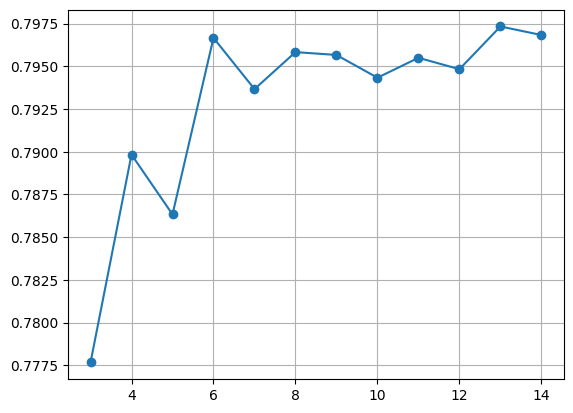

In [73]:
plt.plot(n,metric_k,'o-')

plt.grid()
plt.show()

In [74]:
classifier=KNeighborsClassifier(n_neighbors=14,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred1=classifier.predict(x_test)

print("accuracy score is",accuracy_score(y_test,y_pred1) )

accuracy score is 0.7968333333333333


SVM

In [75]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [76]:
y_pred2=sv.predict(x_test)

print("accuracy score is",accuracy_score(y_test,y_pred2) )

accuracy score is 0.8156666666666667


**Gradient Boosting**

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [78]:
y_pred_gb=gb_clf.predict(x_test)

print("accuracy score is",accuracy_score(y_test,y_pred_gb))

accuracy score is 0.822


Ada Boosting

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(n_estimators=100)
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [80]:
y_pred_ada=ada_clf.predict(x_test)

print("accuracy score is",accuracy_score(y_test,y_pred_ada) )

accuracy score is 0.818


XG Boost

In [81]:
import xgboost as xgb
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
y_pred_xgb=xgb_clf.predict(x_test)

print("accuracy score is",accuracy_score(y_test,y_pred_xgb) )

accuracy score is 0.818


**Best Method is Gradient Boost with accuracy of 82%**

Hyper Parameter Tuning

In [83]:
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)

In [84]:
for train_index,test_index in kf.split(x,y):
  print('training index',train_index)
  print('test index',test_index)

training index [ 6000  6001  6002 ... 29997 29998 29999]
test index [   0    1    2 ... 5997 5998 5999]
training index [    0     1     2 ... 29997 29998 29999]
test index [ 6000  6001  6002 ... 11997 11998 11999]
training index [    0     1     2 ... 29997 29998 29999]
test index [12000 12001 12002 ... 17997 17998 17999]
training index [    0     1     2 ... 29997 29998 29999]
test index [18000 18001 18002 ... 23997 23998 23999]
training index [    0     1     2 ... 23997 23998 23999]
test index [24000 24001 24002 ... 29997 29998 29999]


Cross Validation using KFold

In [85]:
score=cross_val_score(gb_clf,x,y, cv=kf)
print('cross validation score are {}'.format(score))

cross validation score are [0.80233333 0.8055     0.81666667 0.84083333 0.7705    ]


In [86]:
print(' avarege cross validation score are {}'.format(score.mean()))

 avarege cross validation score are 0.8071666666666667


In [87]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [88]:
scoring = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

In [89]:
parameters = {
    "loss":["log_loss", "exponential"],
    "learning_rate":[0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split":np.linspace(0.1, 0.5, 12),
   "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion":["friedman_mse", "squared_error"]

   }


Grid Search CV

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
grid_search=GridSearchCV(GradientBoostingClassifier(),parameters,scoring=scoring,refit=False,cv=2,n_jobs=-1)

In [92]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(estimator=gb_clf,param_distributions=parameters,verbose=1,n_jobs=-1,n_iter=50)

In [93]:
random_result=random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [94]:
print('best parameters:', random_result.best_params_)
print('best score:', random_result.best_score_)

best parameters: {'min_samples_split': 0.28181818181818186, 'max_features': 'log2', 'max_depth': 8, 'loss': 'log_loss', 'learning_rate': 0.075, 'criterion': 'friedman_mse'}
best score: 0.8212083333333334
